In [12]:
from __future__ import annotations
from typing import Final as const
import numpy as np
from numpy import ndarray

In [13]:
class Bandit:
    
    def __init__(self, arms: int= 10):
        """
        Args:
            arms: int スロットマシンの数
        """
        self.rates = np.random.rand(arms)

    def play(self, slot_no: int):
        """
        指定したスロットマシンを1回回す
        Args:
            arms: int スロットマシンの番号
        Returns:
            int 報酬
        """
        rate: float = self.rates[slot_no]
        play_result = np.random.rand()
        reward = 1 if rate > play_result else 0
        return reward

class Agent:

    def __init__(self, epsilon: float, action_size: int):
        """
        Args:
            epsilon: float ε-greedy法のε
            action_size: int 行動数
        """
        self.epsilon = epsilon
        self.Qs: ndarray = np.zeros(action_size) #マシンごとの推定価値
        self.play_counts = np.zeros(action_size) #各マシンのプレイ回数

    def update(self, action: int , reward: int):
        """
        推定価値の更新
        Args:
            action: int 選択したスロットマシンの番号
            reward: int 報酬
        """
        self.play_counts[action] += 1
        self.Qs[action] = self.Qs[action] + (reward - self.Qs[action]) / self.play_counts[action]

    def get_action(self):
        """
        ε-greedy法に基づいて行動を選択
        Returns:
            int 選択したスロットマシンの番号
        """
        action: int
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, len(self.Qs))
        else:
            action = np.argmax(self.Qs)
        return action

In [14]:
STEPS: const = 1000
EPSILON: const = 0.1
SLOT_COUNT: const = 10

bandit = Bandit(SLOT_COUNT)
agent = Agent(EPSILON, SLOT_COUNT)
total_reward = 0
total_rewards = []
rates = []

for step in range(STEPS):
    #行動選択 -> 実行
    action = agent.get_action()
    reward = bandit.play(action)

    # 報酬に基づいく推定価値の更新
    agent.update(action, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(f"Settings : Step:{STEPS}, epsiron: {EPSILON}, slots: {SLOT_COUNT}")
print(f"TOTAL REWARD: {total_reward}")

Settings : Step:1000, epsiron: 0.1, slots: 10
TOTAL REWARD: 761


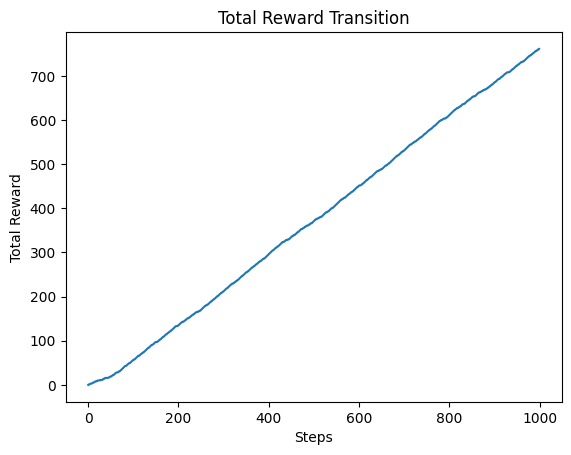

In [15]:
import matplotlib.pyplot as plt

plt.ylabel("Total Reward")
plt.xlabel("Steps")
plt.title("Total Reward Transition")
plt.plot(total_rewards)
plt.show()

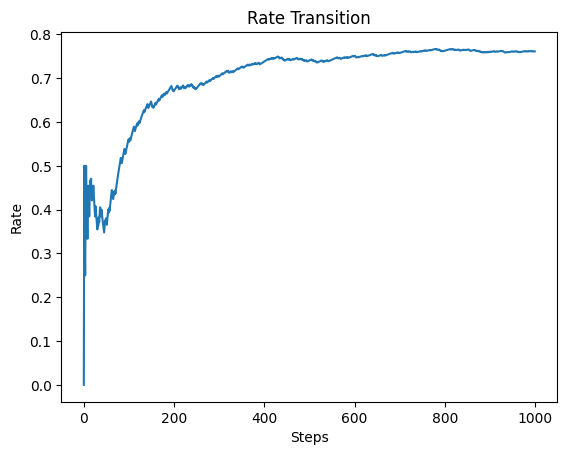

In [16]:
plt.title("Rate Transition")
plt.xlabel("Steps")
plt.ylabel("Rate")
plt.plot(rates)
plt.show()